<a href="https://colab.research.google.com/github/diegomendes1/Analise-MNIST/blob/main/Analise-Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Trabalho de Redes Neurais Artificiais**

    GRUPO:

    Diego Alves da Silva
    Diego Mendes da Silva
    Paulo Guilherme Silva Albuquerque
    Rafael Góes de Azevedo Moreira

####**Importando as depêndencias**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.metrics import classification_report, confusion_matrix

####**Tratamento do dataset MNIST**

In [ ]:
# Carregando o dataset direto da biblioteca do keras
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalização 
x_train = x_train / 255
x_test = x_test / 255

# Redimensionamento das imagens para 28x28x1, para se adequar ao padrão da API Keras
x_train = x_train.reshape(-1,28,28,1)
print("Formato do conjunto de treinamento: ", x_train.shape)

x_test = x_test.reshape(-1,28,28,1)
print("Formato do conjunto de teste: ", x_test.shape)

# Utiliza-se da função to_categorial do utils do keras para fazer o one-hot-encoder da classe.
y_train = np_utils.to_categorical(y_train)

11501568/11490434 [==============================] - 0s 0us/step
Formato do conjunto de treinamento:  (60000, 28, 28, 1)
Formato do conjunto de teste:  (10000, 28, 28, 1)


####**Visualização de algumas imagens randomicas presentes no dataset**

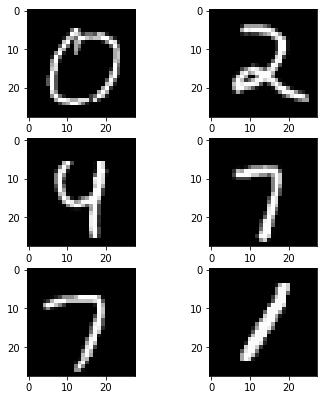

In [ ]:
for i in range(0, 6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    plt.subplot(3,2,i+1)
    plt.imshow(img.reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.subplots_adjust(top=1.4)
plt.show()

####**Modelagem da Rede Neural Convolucional**

In [ ]:
dropout = 0.25
batch_size = 32
epochs = 10
lr = 0.001

model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(64, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=lr)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                        

####**Treinamento**

In [ ]:
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_split=0.2,
                    verbose = 1)

Epoch 1/10
1500/1500 [==============================] - 23s 9ms/step - loss: 0.1923 - accuracy: 0.9432 - val_loss: 0.0675 - val_accuracy: 0.9797
Epoch 2/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0808 - accuracy: 0.9764 - val_loss: 0.0382 - val_accuracy: 0.9887
Epoch 3/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0568 - accuracy: 0.9823 - val_loss: 0.0380 - val_accuracy: 0.9896
Epoch 4/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0486 - accuracy: 0.9857 - val_loss: 0.0380 - val_accuracy: 0.9888
Epoch 5/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0411 - accuracy: 0.9876 - val_loss: 0.0386 - val_accuracy: 0.9890
Epoch 6/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0335 - val_accuracy: 0.9910
Epoch 7/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0298 - accuracy: 0.9912 - val_loss: 0.0347 - val_ac

####**Avaliação do Modelo**


----- Classification Report -----

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


----- Matriz de Confusão -----

[[ 974    0    2    0    1    0    1    0    1    1]
 [   0 1133    2    0    0    0    0    0    0    0]
 [   0    0 1024    0    1    0    1    6    0    0]
 [   0    1  

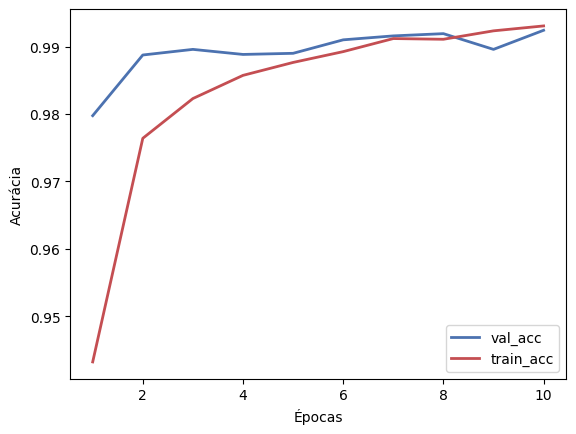

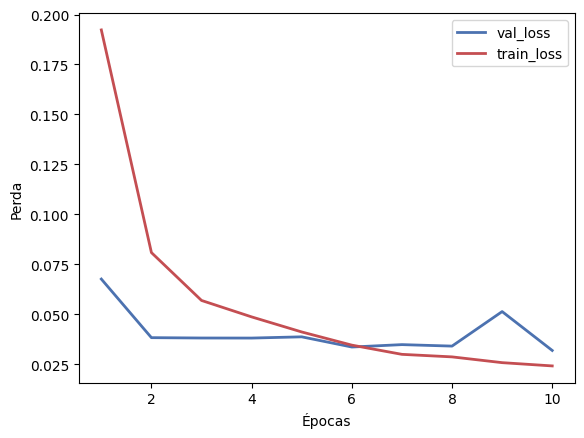

In [ ]:
# Avaliar a CNN
print()
print("----- Classification Report -----")
print()
predictions = model.predict(x_test, batch_size=64)
print(classification_report(y_test, np.argmax(predictions, axis=1),
                            target_names=[str(label) for label in range(10)]))

cm = confusion_matrix(y_test, np.argmax(predictions, axis=1))
print()
print("----- Matriz de Confusão -----")
print()
print(cm)

print()
print("----- Sensibilidade e Especificidade -----")
print()
sensibilidade = cm[0,0]/(cm[0,0]+cm[1,0])
especificidade = cm[1,1]/(cm[0,1]+cm[1,1])
print(f"Sensibilidade: {sensibilidade} Especificidade: {especificidade}")

# Plotando gráfico da Acurácia pelas épocas
print()
print("----------------------------------------")
print()
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
range_epochs = range(1, len(acc) + 1)

plt.style.use('default')
accuracy_val = plt.plot(range_epochs, val_acc, label='val_acc', color='b')
accuracy_train = plt.plot(range_epochs, acc, label='train_acc', color="r")
plt.setp(accuracy_val, linewidth=2.0)
plt.setp(accuracy_train, linewidth=2.0)
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(loc="lower right")
plt.show()

print()
# Plotando gráfico da Perda(loss) pelas épocas
val_loss = history_dict['val_loss']
loss = history_dict['loss']

plt.style.use('default')
loss_val = plt.plot(range_epochs, val_loss, label='val_loss', color="b")
loss_train = plt.plot(range_epochs, loss, label='train_loss', color='r')
plt.setp(loss_val, linewidth=2.0)
plt.setp(loss_train, linewidth=2.0)
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(loc="upper right")
plt.show()

####**Predição**

----- Imagem de entrada ------



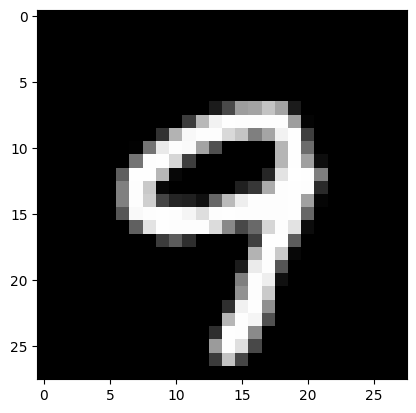


Predição ->  [9]


In [ ]:
num_img = 58
print("----- Imagem de entrada ------")
print()
predictions_img = model.predict(np.expand_dims(x_test[num_img], axis=0))
plt.imshow(x_test[num_img].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()
print()
print("Predição -> ", np.argmax(predictions_img, axis=1))